In [505]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [506]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [507]:
train=pd.read_csv('train 2.csv')
test=pd.read_csv('test_QkPvNLx.csv')
sub=pd.read_csv('sample_submission_pn2DrMq.csv')

In [508]:
train.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [509]:
test.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


In [510]:
sub.head()

,ID,Sales
0,883,5
1,884,5
2,885,5
3,886,5
4,887,5


In [511]:
sub.shape

(36000, 2)

In [512]:
train.columns

Index(['ID', 'Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic',
       'Competition_Metric', 'Sales'],
      dtype='object')

In [513]:
train.dtypes

ID                      int64
Day_No                  int64
Course_ID               int64
Course_Domain          object
Course_Type            object
Short_Promotion         int64
Public_Holiday          int64
Long_Promotion          int64
User_Traffic            int64
Competition_Metric    float64
Sales                   int64
dtype: object

In [514]:
train.isnull().mean()

ID                    0.000000
Day_No                0.000000
Course_ID             0.000000
Course_Domain         0.000000
Course_Type           0.000000
Short_Promotion       0.000000
Public_Holiday        0.000000
Long_Promotion        0.000000
User_Traffic          0.000000
Competition_Metric    0.003445
Sales                 0.000000
dtype: float64

In [ ]:
# data Cleaning 

In [515]:
train['Long_Promotion'].unique()

array([1, 0])

In [516]:
train['Course_Domain'].unique()

array(['Development', 'Software Marketing', 'Finance & Accounting',
       'Business'], dtype=object)

In [517]:
train['Course_Type'].unique()

array(['Course', 'Program', 'Degree'], dtype=object)

In [518]:
train['Short_Promotion'].unique()

array([0, 1])

In [519]:
train['Public_Holiday'].unique()

array([1, 0])

In [520]:
train['User_Traffic'].unique()

array([11004, 13650, 11655, ..., 55965, 57603, 69258])

In [521]:
train['Competition_Metric'].unique()

array([0.007, 0.186, 0.316, 0.099, 0.027, 0.041, 0.012, 0.014, 0.004,
       0.017, 0.054, 0.182, 0.042, 0.013, 0.06 , 0.001, 0.   , 0.129,
       0.029, 0.101, 0.056, 0.003, 0.002, 0.064, 0.237, 0.082, 0.006,
       0.4  , 0.009, 0.087, 0.097, 0.037, 0.049, 0.297, 0.015, 0.021,
       0.263, 0.046, 0.044, 0.295, 0.155, 0.024, 0.141, 0.032, 0.22 ,
       0.193, 0.116, 0.199, 0.005, 0.043, 0.104, 0.059, 0.075, 0.045,
       0.047, 0.768, 0.018, 0.01 , 0.016, 0.068, 0.334, 0.02 , 0.218,
       0.034, 0.419, 0.023, 0.214, 0.112, 0.039, 0.019, 0.035, 0.172,
       0.022, 0.076, 0.166, 0.255, 0.036, 0.051, 0.055, 0.084, 0.267,
       0.074, 0.09 , 0.198, 0.114, 0.008, 0.178, 0.028, 0.038, 0.142,
       0.229, 0.057, 0.061, 0.294, 0.202, 0.213, 0.122, 0.03 , 0.092,
         nan, 0.126, 0.261, 0.509, 0.025, 0.067, 0.149, 0.51 , 0.23 ,
       0.11 , 0.133, 0.053, 0.14 , 0.106, 0.123, 0.117, 0.109, 0.026,
       0.344, 0.121, 0.077, 0.108, 0.111, 0.091, 0.396, 0.171, 0.033,
       0.15 , 0.052,

In [522]:
def impute_na_numeric(train,test,var):
    mean = train[var].mean()
    median = train[var].median()
    
    train[var+"_mean"] = train[var].fillna(mean)
    train[var+"_median"] = train[var].fillna(median)
    
    var_original = train[var].std()**2
    var_mean = train[var+"_mean"].std()**2
    var_median = train[var+"_median"].std()**2
    
    print("Original Variance: ",var_original)
    print("Mean Variance: ",var_mean)
    print("Median Variance: ",var_median)
    
    if((var_mean < var_original) | (var_median < var_original)):
        if(var_mean < var_median):
            train[var] = train[var+"_mean"]
            test[var] = test[var].fillna(mean)
        else:
            train[var] = train[var+"_median"]
            test[var] = test[var].fillna(median)
    else:
        test[var] = test[var].fillna(median)
    train.drop([var+"_mean",var+"_median"], axis=1, inplace=True)

In [523]:
impute_na_numeric(train,test,'Competition_Metric')

Original Variance:  0.010023099322869284
Mean Variance:  0.009988572412925322
Median Variance:  0.00999361990961941


In [524]:
train.isnull().mean()

ID                    0.0
Day_No                0.0
Course_ID             0.0
Course_Domain         0.0
Course_Type           0.0
Short_Promotion       0.0
Public_Holiday        0.0
Long_Promotion        0.0
User_Traffic          0.0
Competition_Metric    0.0
Sales                 0.0
dtype: float64

In [525]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization of data 
1. Used seaborn and matplot lib to see the behaviour of data with reqpest to output 

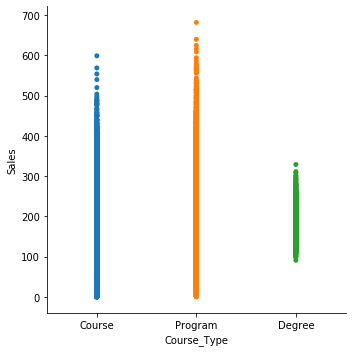

In [526]:
sns.catplot(x="Course_Type", y="Sales",jitter=False, data=train)

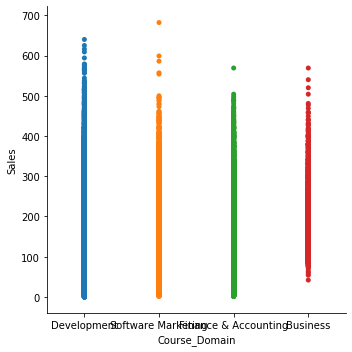

In [527]:
sns.catplot(x="Course_Domain", y="Sales",jitter=False, data=train)

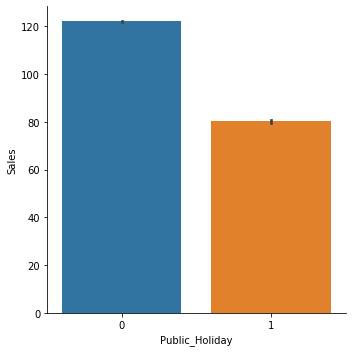

In [528]:
sns.catplot(x="Public_Holiday", y="Sales",  kind="bar", data=train);

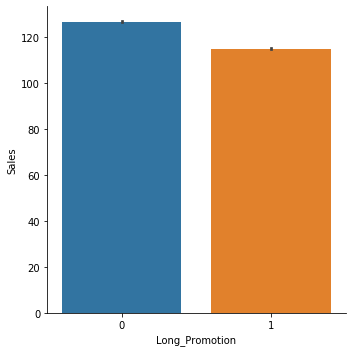

In [529]:
sns.catplot(x="Long_Promotion", y="Sales",  kind="bar", data=train);

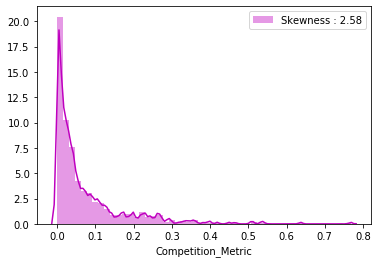

In [530]:
# Explore Fare distribution 
g = sns.distplot(train["Competition_Metric"], color="m", label="Skewness : %.2f"%(train["Competition_Metric"].skew()))
g = g.legend(loc="best")

**Outlier Removal**

In [531]:
import warnings
warnings.filterwarnings('ignore')

In [532]:
# Apply log to Fare to reduce skewness distribution
train["Competition_Metric"] = train["Competition_Metric"].map(lambda i: np.log(i) if i > 0 else 0)

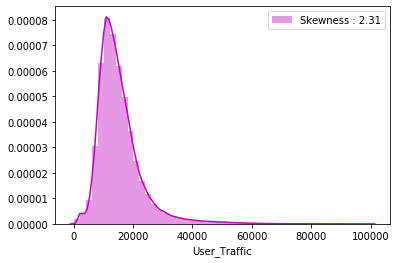

In [533]:
# Explore Fare distribution 
g = sns.distplot(train["User_Traffic"], color="m", label="Skewness : %.2f"%(train["User_Traffic"].skew()))
g = g.legend(loc="best")

In [534]:
# Apply log to Fare to reduce skewness distribution
train["User_Traffic"] = train["User_Traffic"].map(lambda i: np.log(i) if i > 0 else 0)

# Determine the skewness and outliers if nay present i the dataset

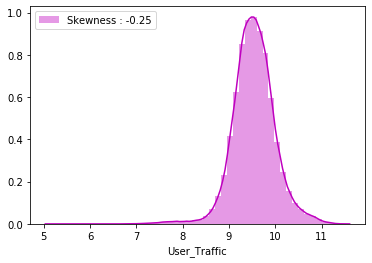

In [535]:
# Explore Fare distribution 
g = sns.distplot(train["User_Traffic"], color="m", label="Skewness : %.2f"%(train["User_Traffic"].skew()))
g = g.legend(loc="best")

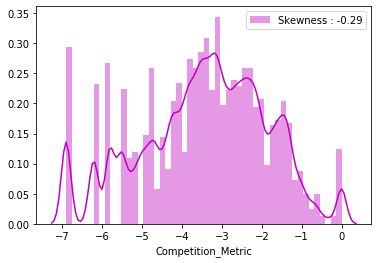

In [536]:
# Explore Fare distribution 
g = sns.distplot(train["Competition_Metric"], color="m", label="Skewness : %.2f"%(train["Competition_Metric"].skew()))
g = g.legend(loc="best")

In [537]:
from sklearn.preprocessing import LabelEncoder

In [538]:
onehoten=LabelEncoder()
train['Course_Domain']=onehoten.fit_transform(train['Course_Domain'])
train['Course_Type']=onehoten.fit_transform(train['Course_Type'])
test['Course_Domain']=onehoten.fit_transform(test['Course_Domain'])
test['Course_Type']=onehoten.fit_transform(test['Course_Type'])

In [539]:
train['Course_Type'].unique()

array([0, 2, 1])

In [540]:
train.columns

Index(['ID', 'Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic',
       'Competition_Metric', 'Sales'],
      dtype='object')

In [541]:
drop_cols = ['ID','Day_No', 'Course_ID','User_Traffic']
drop_cols1=['ID','Day_No', 'Course_ID']

In [542]:
train.drop(drop_cols,axis=1).drop(["Sales"],axis=1).values

array([[ 1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        -4.96184513],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -4.96184513],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -4.96184513],
       ...,
       [ 3.        ,  2.        ,  0.        ,  0.        ,  1.        ,
        -2.65926004],
       [ 3.        ,  2.        ,  0.        ,  0.        ,  1.        ,
        -2.65926004],
       [ 3.        ,  2.        ,  1.        ,  0.        ,  1.        ,
        -2.65926004]])

In [543]:
train.drop(drop_cols,axis=1).drop(["Sales"],axis=1).columns

Index(['Course_Domain', 'Course_Type', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'Competition_Metric'],
      dtype='object')

In [544]:
X = train.drop(drop_cols,axis=1).drop(["Sales"],axis=1).values
y = train["Sales"].values

In [545]:
val_test = test.drop(drop_cols1,axis=1).values

In [547]:
test.drop(drop_cols1,axis=1).columns

Index(['Course_Domain', 'Course_Type', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'Competition_Metric'],
      dtype='object')

In [548]:
from sklearn.model_selection import train_test_split

In [549]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

**Feature Scaling**

In [550]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#ss.fit(X_train)


In [551]:
X_train_ss=ss.fit_transform(X_train)

In [552]:
X_test_ss = ss.transform(X_test)

In [553]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge,SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,VotingRegressor
from math import sqrt

In [554]:
#lm=LinearRegression()
#rf=RandomForestRegressor()

In [555]:
regression_models = ['SGDRegressor',
                    'DecisionTreeRegressor','RandomForestRegressor','AdaBoostRegressor']

In [556]:
mse = []
rmse = []
mae = []
models = []
estimators = []

In [557]:
for reg_model in regression_models:
    
    model = eval(reg_model)()
    
    model.fit(X_train_ss,y_train)
    y_pred = model.predict(X_test_ss)
    
    models.append(type(model).__name__)
    estimators.append((type(model).__name__,model))
    
    mse.append(mean_squared_error(y_test,y_pred))
    rmse.append(mean_squared_error(y_test,y_pred)**0.5)
    mae.append(mean_absolute_error(y_test,y_pred))

In [558]:
model_dict = {"Models":models,
             "MSE":mse,
             "RMSE":rmse,
             "MAE":mae}

In [559]:
model_df = pd.DataFrame(model_dict)
model_df

,Models,MSE,RMSE,MAE
0,SGDRegressor,2402.884429,49.019225,36.378114
1,DecisionTreeRegressor,1168.931692,34.189643,24.158133
2,RandomForestRegressor,1169.615395,34.199640,24.170644
3,AdaBoostRegressor,2673.285132,51.703821,41.037340


In [560]:
model_df["Inverse_Weights"] = model_df['RMSE'].map(lambda x: np.log(1.0/x))
model_df

,Models,MSE,RMSE,MAE,Inverse_Weights
0,SGDRegressor,2402.884429,49.019225,36.378114,-3.892213
1,DecisionTreeRegressor,1168.931692,34.189643,24.158133,-3.531923
2,RandomForestRegressor,1169.615395,34.199640,24.170644,-3.532215
3,AdaBoostRegressor,2673.285132,51.703821,41.037340,-3.945532


In [561]:
vr = VotingRegressor(estimators=estimators,weights=model_df.Inverse_Weights.values)

In [562]:
vr.fit(X_train,y_train)

VotingRegressor(estimators=[('SGDRegressor',
                             SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=None,
                                          shuffle=True, tol=0.001,
                                          validation_fraction=0.1, verbose=0,
                                          warm_star...
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                   

In [563]:
val = ss.transform(val_test)

In [564]:
y_pred = vr.predict(val)

In [565]:
#y_pred = vr.predict(X_test)

In [566]:
'''models.append("Voting_Regressor")
mse.append(mean_squared_error(y_test,y_pred))
rmse.append(mean_squared_error(y_test,y_pred)**0.5)
mae.append(mean_absolute_error(y_test,y_pred))'''

ValueError: Found input variables with inconsistent numbers of samples: [128022, 36000]

In [ ]:
'''tuned_sub_df = pd.concat([val['PassengerId'],
                          pd.DataFrame(y_pred_tuned_sub,columns=["Survived"])],
                         axis=1)
tuned_sub_df.head()'''

In [572]:
sub_file = pd.concat([test['ID'],pd.DataFrame(y_pred,columns=["Sales"])],axis=1)
sub_file.head()

,ID,Sales
0,883,236.105008
1,884,236.105008
2,885,236.105008
3,886,236.105008
4,887,85.635639


In [573]:
sub_file.shape

(36000, 2)

In [574]:
#sub_file_final=pd.concat()

In [575]:
#sub_file.columns

In [576]:
sub_file.to_csv('Submission_file_Hack.csv',index=False)